In [1]:
!pip install ultralytics -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00


In [10]:
import os

# -----------------------------------------------------------------------------
# ETAPA 2: DOWNLOAD DO DATASET VIA GITHUB PÚBLICO
# -----------------------------------------------------------------------------
print("\n========================================================")
print("== ETAPA 2: Baixando o Dataset Customizado (GitHub) ==")
print("========================================================")
print("Usando 'git clone' para baixar um repositório público...")

# Comando para clonar (baixar) o novo repositório
# Este repositório contém um dataset de capacetes
!git clone https://github.com/jomarkow/Safety-Helmet-Detection.git

print("\n✅ Dataset baixado na pasta 'Safety-Helmet-Detection'.")

# O 'data.yaml' está DENTRO da pasta que acabamos de baixar.
DATA_YAML_PATH = 'Safety-Helmet-Detection/data.yaml'

# Verificação
if not os.path.exists(DATA_YAML_PATH):
    print(f"🚨 ERRO: Não foi possível encontrar '{DATA_YAML_PATH}'.")
    print("O repositório pode ter mudado de estrutura.")
    raise SystemExit
else:
    print(f"Arquivo 'data.yaml' encontrado em: {DATA_YAML_PATH}")





== ETAPA 2: Baixando o Dataset Customizado (GitHub) ==
Usando 'git clone' para baixar um repositório público...
fatal: destination path 'Safety-Helmet-Detection' already exists and is not an empty directory.

✅ Dataset baixado na pasta 'Safety-Helmet-Detection'.
Arquivo 'data.yaml' encontrado em: Safety-Helmet-Detection/data.yaml
--- Baixando COCO128 (Base) ---
Unzipping /content/coco128.zip to /content/coco128...: 100% ━━━━━━━━━━━━ 263/263 4.4Kfiles/s 0.1s


In [11]:
import os
from ultralytics import YOLO
import ultralytics
ultralytics.checks()


# -----------------------------------------------------------------------------
# ETAPA 3: TREINAMENTO (TRANSFER LEARNING)
# -----------------------------------------------------------------------------
print("\n========================================================")
print("== ETAPA 3: Treinamento (Transfer Learning) ==")
print("========================================================")
print(f"Iniciando o treinamento a partir do modelo 'yolov8n.pt'...")
print("Usando 10% das classes (Helmet, No-Helmet) do dataset do GitHub. e so 10 epochs")

# Carrega o modelo YOLOv8 'nano' pré-treinado no COCO
model = YOLO('yolov8n.pt')

# Inicia o treinamento (transfer learning)
# A biblioteca usará automaticamente apenas 10% dos dados
results = model.train(
    data=DATA_YAML_PATH,     # Caminho para o .yaml
    epochs=10,               # Número de épocas para uma melhor resposta usar 50 epochs
    imgsz=640,               # Tamanho da imagem
    fraction=0.1,
    project='treino_yolo_github_10_percent', # Novo nome de projeto
    name='meu_modelo_capacete_10pct',
    exist_ok=True
)

print("\n✅ Treinamento (10%) Concluído!")


--- Copiando dados do COCO (IDs originais) ---
--- Processando seu Dataset (Mapeando para 80 e 81) ---
Encontradas 20 imagens do seu dataset customizado.
Processamento concluído: 0 capacetes e 0 cabeças adicionados.

--- Iniciando Treinamento Unificado ---
Ultralytics 8.3.231 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=datasets/coco_plus_helmet_head/data_unified.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr


=== SISTEMA DE FUSÃO: Capacete (Seu Modelo) + Mundo (Modelo Original) ===
Carregando Inteligência Artificial...

Faça upload da foto da obra (com cachorro e operário):


Saving obras-e-reformas-2.jpg to obras-e-reformas-2 (2).jpg

Processando obras-e-reformas-2 (2).jpg...


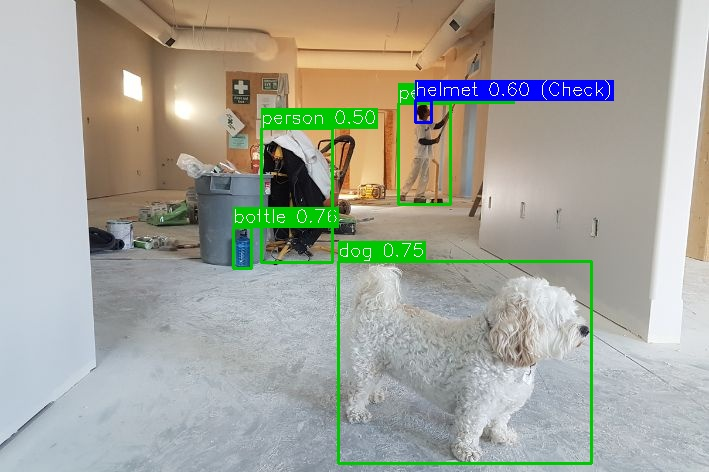

Salvo em: resultado_final_obras-e-reformas-2 (2).jpg


In [13]:
import cv2
import torch
import numpy as np
from ultralytics import YOLO
from google.colab import files
from IPython.display import Image, display
import os

print("\n=== SISTEMA DE FUSÃO: Capacete (Seu Modelo) + Mundo (Modelo Original) ===")

# --- 1. DEFINA OS MODELOS ---
# Caminho do modelo que você treinou SÓ para capacetes (verifique se o arquivo existe na pasta)
# Se você treinou o unificado e ficou ruim, tente achar o treino anterior na pasta 'runs' ou treine só capacete de novo.
PATH_SEU_MODELO = 'treino_yolo_github_10_percent/meu_modelo_capacete_10pct/weights/best.pt'

if not os.path.exists(PATH_SEU_MODELO):
    print(f"⚠️ AVISO: Não achei {PATH_SEU_MODELO}")
    print("Vou tentar procurar automaticamente qualquer 'best.pt' nas pastas...")
    import glob
    possiveis = glob.glob('runs/**/*.pt', recursive=True) + glob.glob('treino_yolo_github*/**/*.pt', recursive=True)
    if possiveis:
        PATH_SEU_MODELO = possiveis[-1] # Pega o mais recente
        print(f"✅ Usando modelo encontrado: {PATH_SEU_MODELO}")
    else:
        print("❌ ERRO: Nenhum modelo treinado encontrado. Você precisa rodar a ETAPA 3 (Treino só de capacete) novamente.")
        raise SystemExit

# Carrega os dois cérebros
print("Carregando Inteligência Artificial...")
model_mundo = YOLO('yolov8n.pt')       # Sabe o que é cachorro, pessoa, carro (Treinado com 118k fotos)
model_capacete = YOLO(PATH_SEU_MODELO) # Sabe o que é capacete (Seu treino)

# --- 2. UPLOAD E DETECÇÃO ---
print("\nFaça upload da foto da obra (com cachorro e operário):")
uploaded = files.upload()

if uploaded:
    for f in uploaded.keys():
        print(f"\nProcessando {f}...")
        img = cv2.imread(f)

        # Detecção 1: Coisas do Mundo (Confiança 0.4)
        # classes=[0, 16] -> Se quiser filtrar só Pessoa(0) e Cachorro(16). Remova para ver tudo.
        res_mundo = model_mundo.predict(img, conf=0.45, verbose=False)

        # Detecção 2: Capacetes (Confiança 0.2 - deixei mais baixo para garantir que pegue)
        res_capacete = model_capacete.predict(img, conf=0.20, verbose=False)

        # --- 3. DESENHAR RESULTADOS ---
        # Vamos desenhar manualmente para ter controle total das cores

        def plot_box(image, box, label_text, color):
            # Pega coordenadas
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            # Desenha retângulo
            cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
            # Fundo do texto
            (w, h), _ = cv2.getTextSize(label_text, cv2.FONT_HERSHEY_SIMPLEX, 0.6, 1)
            cv2.rectangle(image, (x1, y1 - 20), (x1 + w, y1), color, -1)
            # Texto
            cv2.putText(image, label_text, (x1, y1 - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255, 255, 255), 1)

        # Desenha modelo MUNDO (Verde)
        for r in res_mundo:
            for box in r.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                name = r.names[cls_id]
                # Desenha tudo EXCETO capacete se por acaso o modelo original achar algo parecido
                label = f"{name} {conf:.2f}"
                plot_box(img, box, label, (0, 200, 0)) # Verde

        # Desenha modelo CAPACETE (Azul)
        for r in res_capacete:
            for box in r.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                # No seu modelo só tem capacete (0) ou head (1) ou nada
                # Vamos assumir que tudo que ele achou é relevante para EPI
                name = "CAPACETE" if cls_id == 0 else "HEAD"
                # Use o nome interno se tiver
                if hasattr(model_capacete, 'names'):
                     name = model_capacete.names[cls_id]

                label = f"{name} {conf:.2f} (Check)"
                plot_box(img, box, label, (255, 0, 0)) # Azul

        # Salva e Mostra
        output_path = f"resultado_final_{f}"
        cv2.imwrite(output_path, img)
        display(Image(output_path, width=700))
        print(f"Salvo em: {output_path}")